In [2]:
# import required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import sleep

from random import randint

# set the directory for the data
data_dir = 'Resources'

# set the directory for the output
output_dir = 'Output'

import pathlib
cwd = pathlib.Path().resolve()


In [3]:

aq_df = pd.read_csv(os.path.join(cwd, output_dir, 'air_quality.csv'))
ev_stations_df = pd.read_csv(os.path.join(cwd, data_dir, 'Electric_Vehicle_Charging_Stations.csv'))
walkability_df = pd.read_csv(os.path.join(cwd, data_dir, 'EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'))
# income_df = pd.read_csv(os.path.join(cwd, data_dir, 'Income.csv'))
vehicle_df = pd.read_csv(os.path.join(cwd, data_dir, 'Vehicle__Snowmobile__and_Boat_Registrations.csv'))

display(aq_df.head())
display(ev_stations_df.head())
display(walkability_df.head())
# display(income_df.head())
display(vehicle_df.head())

C:\Users\Tim\AppData\Local\Temp\ipykernel_27004\551019691.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv(os.path.join(cwd, data_dir, 'Vehicle__Snowmobile__and_Boat_Registrations.csv'))


,DateObserved,HourObserved,LocalTimeZone,ReportingArea,StateCode,Latitude,Longitude,ParameterName,AQI,CategoryNumber,CategoryName,Category
0,2018-01-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,57,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
1,2018-01-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,55,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
2,2018-02-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,61,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
3,2018-02-15,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,70,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"
4,2018-03-01,0,EST,New York City Region,NY,40.8419,-73.8359,PM2.5,58,2,Moderate,"{'Number': 2, 'Name': 'Moderate'}"


,Station Name,Street Address,City,Access Days Time,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,New Georeferenced Column
0,BMW OF DARIEN,138-142 Ledge Rd,Darien,24 hours daily,NONE,2,NONE,NONE,POINT (-73.4764687 41.072882)
1,Dunkin’ - Tesla Supercharger,893 E Main St,Meriden,24 hours daily; for Tesla use only,NONE,NONE,8,NONE,POINT (-72.773473 41.527367)
2,Town of Beacon Falls - Commuter Lot,105 N Main St,Beacon Falls,24 hours daily,NONE,1,NONE,NONE,POINT (-73.065583 41.44548100000001)
3,OLD SAYBROOK VW,319 Middlesex Turnpike,Old Saybrook,24 hours daily,NONE,2,NONE,NONE,POINT (-72.3825 41.3102778)
4,Fairfield Rail Station,80 Mill Plain Rd,Fairfield,24 hours daily,NONE,2,NONE,NONE,POINT (-73.264511 41.143125)


,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,297836.0831
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,484945.1466
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,106705.9281
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,481828.4303
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,687684.7752


,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,925,PSD,NEW YORK CITY,NY,10007,NEW YORK,1972.0,INTER,SN/P,GAS,4009.0,NaN,NaN,12/01/1972,NaN,YW,N,N,N
1,VEH,4H302459,PSD,SYRACUSE,NY,13202,ONONDAGA,1961.0,BUICK,4DSD,GAS,4129.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N
2,VEH,3B31H138446,PSD,SINCLAIRVILLE,NY,0,CHAUTAUQUA,1973.0,FORD,4DSD,GAS,3693.0,NaN,NaN,12/01/1972,NaN,GL,N,N,N
3,VEH,2D29M3G108024,PSD,HENRIETTA,NY,14467,MONROE,1973.0,PONTI,4DSD,GAS,4014.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N
4,VEH,12861,PSD,LEXINGTON,NY,12452,GREENE,1972.0,OSHKO,SN/P,DIESEL,42000.0,NaN,NaN,12/01/1972,NaN,RD,N,N,N


In [4]:
# format and clean vehicle registaion data

# filter for NY state
ny_vehcile_regestrations_df = vehicle_df[vehicle_df['State'] == 'NY']

# convert dates to datetime
ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])

# filter for vehicles
ny_vehcile_regestrations_df = ny_vehcile_regestrations_df[ny_vehcile_regestrations_df['Record Type'] == 'VEH']

display(ny_vehcile_regestrations_df.value_counts('City'))


C:\Users\Tim\AppData\Local\Temp\ipykernel_27004\3284376526.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_vehcile_regestrations_df['Reg Valid Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Valid Date'])
C:\Users\Tim\AppData\Local\Temp\ipykernel_27004\3284376526.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_vehcile_regestrations_df['Reg Expiration Date'] = pd.to_datetime(ny_vehcile_regestrations_df['Reg Expiration Date'])


City
BROOKLYN          536605
ROCHESTER         310424
BRONX             283219
STATEN ISLAND     282800
NEW YORK          226600
                   ...  
KEW GARDN HLL          1
KEW GARDNS HL          1
KEW GARDNS HLL         1
KEW GARENS             1
ZONE PARK              1
Name: count, Length: 23894, dtype: int64

In [5]:
# get data for all five boroughs
manhattan = ['MANHATTAN', 'NEW YORK', 'BROOKLYN', 'QUEENS', 'BRONX', 'STATEN ISLAND']
brooklyn = ['BROOKLYN', 'BRKLYN']
queens = [
'NEIGHBORHOODS','ALLEY POND PARK','ARVERNE','ASTORIA','ASTORIA HEIGHTS',
'AUBURNDALE','BAY TERRACE','BAYSIDE','BAYSIDE HILLS','BAYSWATER','BEECHHURST',
'BELLAIRE','BELLE HARBOR','BELLEROSE','BELLEROSE MANOR','BREEZY POINT',
'BRIARWOOD','BROAD CHANNEL','BROADWAY-FLUSHING','BROOKVILLE','BROOKVILLE PARK',
'CAMBRIA HEIGHTS','COLLEGE POINT','CORONA','CUNNINGHAM PARK','DITMARS-STEINWAY',
'DOUGLAS MANOR','DOUGLASTON','DOWNTOWN FLUSHING','EAST ELMHURST','EDGEMERE',
'ELMHURST','FAR ROCKAWAY','FLORAL PARK','FLUSHING HEIGHTS',
'FLUSHING MEADOWS CORONA PARK','FOREST HILLS','FOREST HILLS GARDENS',
'FOREST PARK','FORT TILDEN-JACOB RIIS PARKS','FRESH MEADOWS','GLEN OAKS',
'GLENDALE','HAMILTON BEACH''HILLCREST','THE HOLE','HOLLIS','HOLLIS HILLS',
'HOLLISWOOD','HOWARD BEACH','HUNTER \'S POINT','JACKSON HEIGHTS','JAMAICA',
'JAMAICA CENTER''JAMAICA ESTATES','JAMAICA HILLS','KEW GARDENS',
'KEW GARDENS HILLS','KISSENA','KISSENA PARK','LAURELTON''LINDEN HILL',
'LINDENWOOD','LITTLE NECK','LOCUST MANOR','LONG ISLAND CITY','MALBA','MASPETH',
'MEADOWMERE','MIDDLE VILLAGE','MURRAY HILL','NEPONSIT','NEW HYDE PARK',
'NORTH CORONA','OAKLAND GARDENS','OLD HOWARD BEACH','OZONE PARK','POMONOK',
'QUEENS VILLAGE','QUEENSBORO HILL','REGO PARK','RICHMOND HILL',
'RICHMOND HILL EAST','RIDGEWOOD''ROCHDALE','ROCKAWAY BEACH','ROCKAWAY PARK',
'ROSEDALE','ROXBURY','SOUTH JAMAICA','SOUTH OZONE PARK','SOUTH RICHMOND HILL',
'SPRINGFIELD GARDENS','ST. ALBANS','SUNNYSIDE','UTOPIA','WHITESTONE',
'WILLETS POINT','WOODHAVEN','WOODSIDE'
]
bronx = ['BRONX']
staten_island = ['STATEN ISLAND']
borough_data = manhattan + brooklyn + queens + bronx + staten_island



In [12]:
def getCarData(city_names):
    cars = pd.DataFrame()
    for city in city_names:
        cars = pd.concat([cars, ny_vehcile_regestrations_df.loc[ny_vehcile_regestrations_df['City'] == city]])
    cars['VIN'] = cars['VIN'].fillna(value='Unknown')


    # groups by VIN and gets the min and max dates for registration
    cars = cars.groupby('VIN').agg({'Reg Valid Date': 'min', 'Reg Expiration Date': 'max', 'Fuel Type': 'first'})

    # # filter for cars that were registered between 2018 and 2021
    cars = cars.reset_index()

    return cars

In [13]:
bronx_cars = getCarData(bronx)
brooklyn_cars = getCarData(brooklyn)
queens_cars = getCarData(queens)
manhattan_cars = getCarData(manhattan)
staten_island_cars = getCarData(staten_island)


In [14]:
display(bronx_cars['Fuel Type'].value_counts())
display(brooklyn_cars['Fuel Type'].value_counts())
display(queens_cars['Fuel Type'].value_counts())
display(manhattan_cars['Fuel Type'].value_counts())
display(staten_island_cars['Fuel Type'].value_counts())

Fuel Type
GAS         267513
DIESEL       10793
ELECTRIC      3724
COMP N/G       746
FLEX           280
NONE           116
OTHER           45
PROPANE          2
Name: count, dtype: int64

Fuel Type
GAS         508870
DIESEL       17023
ELECTRIC      9306
FLEX           509
NONE           441
OTHER          378
COMP N/G        57
PROPANE         22
Name: count, dtype: int64

Fuel Type
GAS         615052
DIESEL       22923
ELECTRIC     12072
NONE          1307
FLEX           951
COMP N/G       166
OTHER          125
PROPANE          7
Name: count, dtype: int64

Fuel Type
GAS         1267436
DIESEL        37054
ELECTRIC      22413
FLEX           1229
NONE           1063
COMP N/G       1047
OTHER           567
PROPANE          27
Name: count, dtype: int64

Fuel Type
GAS         273602
DIESEL        5098
ELECTRIC      3759
FLEX           185
OTHER           88
NONE            63
COMP N/G         5
Name: count, dtype: int64

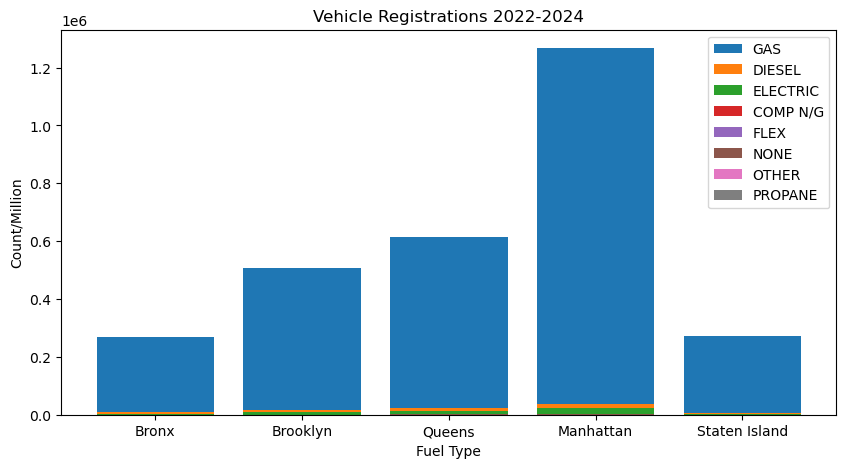

In [33]:
# display all cities by FuelType as a signle bar chart
fuel_types = bronx_cars['Fuel Type'].value_counts().index
fuel_types = fuel_types.append(brooklyn_cars['Fuel Type'].value_counts().index)
fuel_types = fuel_types.append(queens_cars['Fuel Type'].value_counts().index)
fuel_types = fuel_types.append(manhattan_cars['Fuel Type'].value_counts().index)
fuel_types = fuel_types.append(staten_island_cars['Fuel Type'].value_counts().index)

fuel_types = fuel_types.unique()

fig, ax = plt.subplots(figsize=(10, 5))
for fuel in fuel_types:
    cars = pd.DataFrame({'City': ['Bronx', 'Brooklyn', 'Queens', 'Manhattan', 'Staten Island'], 'Count': [bronx_cars[bronx_cars['Fuel Type'] == fuel].shape[0], brooklyn_cars[brooklyn_cars['Fuel Type'] == fuel].shape[0], queens_cars[queens_cars['Fuel Type'] == fuel].shape[0], manhattan_cars[manhattan_cars['Fuel Type'] == fuel].shape[0], staten_island_cars[staten_island_cars['Fuel Type'] == fuel].shape[0]]})
    ax.bar(cars['City'], cars['Count'], label=fuel)

plt.legend()
plt.xlabel('Fuel Type')
plt.ylabel('Count/Million')
plt.title('Vehicle Registrations 2022-2024')
plt.show()
